# <h1><center>Netflix Dataset Exploration and Visual Data Analysis</center></h1>

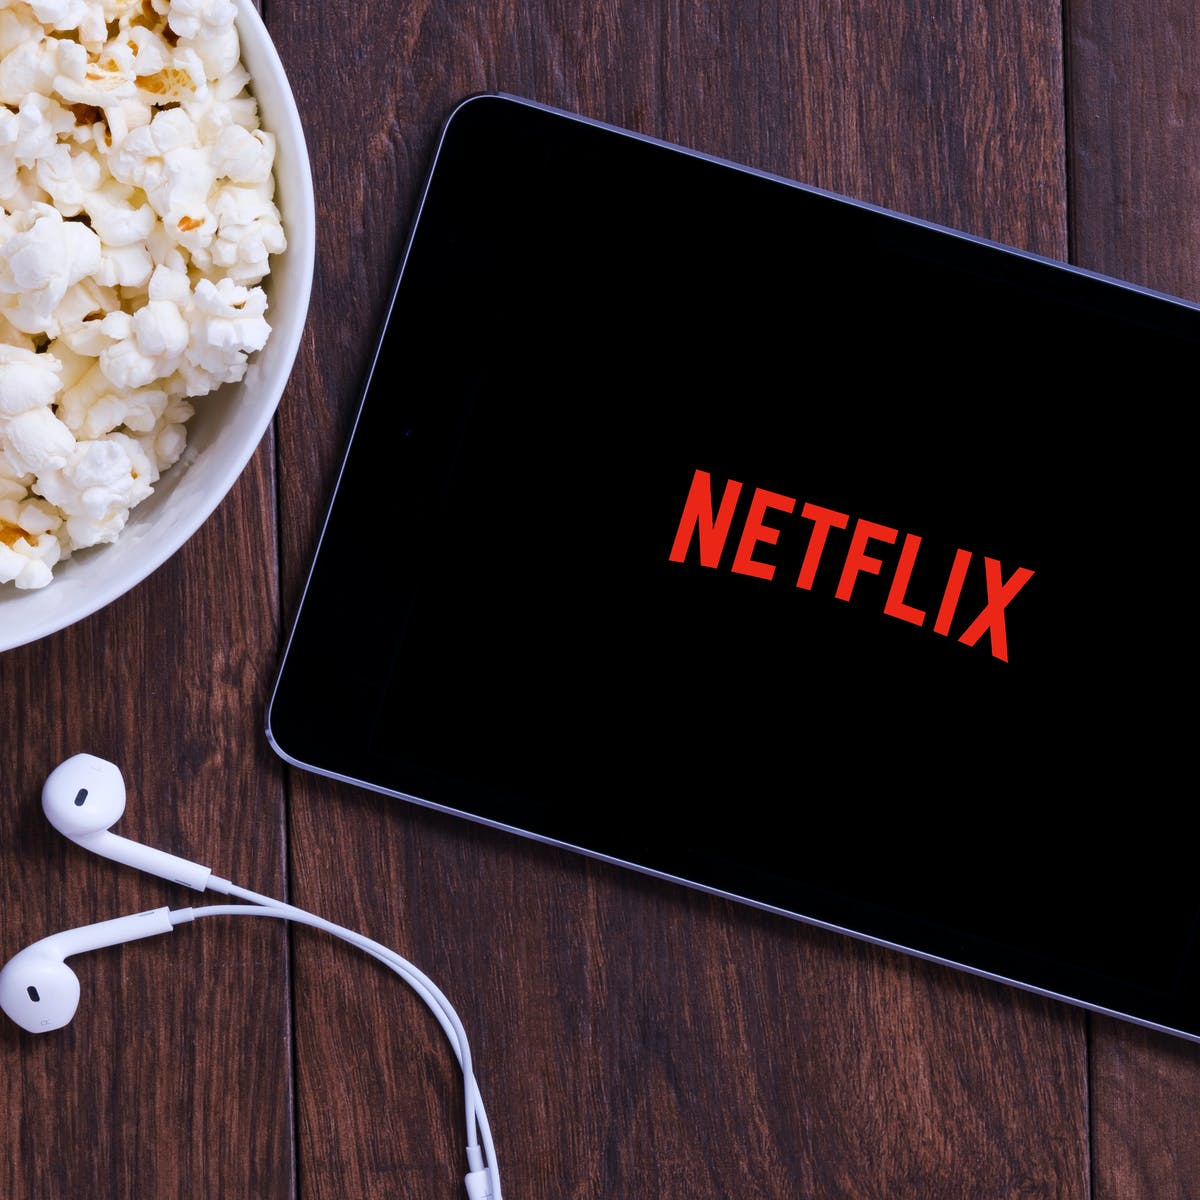

## Introduction

Netflix has been the biggest online streaming service ever since its invention. With millions of people tuning in worldwide every day, I want to find out what it could be that helps them in staying so successful with such a monopoly of the streaming industry.

Follow along with me as I dig into the data and explore the possibilities behind it's success.

# Table of Contents

#### 1. Exploring our dataframe


#### 2. Cleaning up the dataframe


#### 3. Visualisation

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")

# Exploring our dataframe

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Splitting dataframe by TV Shows and Movies for ease of use later on

movies = df[df['type'] == "Movie"]
tv_shows = df[df['type'] == "TV Show"]

In [ ]:
movies.head()

In [ ]:
tv_shows.head()

# Cleaning up the dataframe

In [ ]:
df.info()

Here we can see that the "director", "cast", "country", "date_added" and "rating" columns have missing values. We are going to fix these issues now.

### Method of approach

- Remove "show_id" column

- To fix the missing values in the "date_added" column, we will replace them with January 1st, and the release year will be the mode of the release years in the dataframe.

- As there are only 10 missing values in the "rating" column, we can replace them with the most commonly occuring rating without skewing the data too much.

- For the missing values in the "country" column, we will replace them with United States rather than losing data by deleting the column.

- Both "director" and "cast" column are not neccessary for this particular data analysis so for now we will remove them. In general practise they should not be skipped as they would be a key part of a recommendation system.

In [ ]:
# Dropping the ID column

df.drop('show_id', axis = 1, inplace = True)

In [ ]:
# Replacing NaN values in the date added column with the mode of release year

df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [ ]:
# Checking for any remaining NaN values in the date added column

df['date_added'].isnull().sum()

In [ ]:
# Creating a new column showing the release month for further statistical analysis

df['release_month'] = df['date_added'].apply(lambda x: x.lstrip().split (" ")[0])

In [ ]:
df.head()

In [ ]:
df['rating'].value_counts()

In [ ]:
# Replacing missing rating values with the most commonly occuring value (TV-MA)

df['rating'].replace(np.nan, 'TV-MA', inplace = True)

In [ ]:
df['country'].value_counts()

In [ ]:
# Replacing missing country values with the most commonly occuring value (United States)

df['country'].replace(np.nan, 'United States', inplace = True)

In [ ]:
# Deleting the director and cast columns as planned

df.drop(["director", "cast"], axis = 1, inplace = True)

In [ ]:
# Checking for any left over missing values before moving on

df.isnull().sum()

In [ ]:
df.head()

Our data is now clean enough for us to move onto visualisation.

# Visualisation

### Questions that we will answer using visualisations

- Are there more Movies or TV shows on Netflix?


- What are the most common ratings used for Movies vs TV shows? Are they different?


- What are the most common genres of Movies vs TV shows? Are they different?


- During which months does Netflix add the most new content?


##### Are there more Movies or TV shows on Netflix?

In [ ]:
print(df.type.value_counts())
plt.figure(figsize = (6,6))
sns.countplot(df.type, palette='pastel')
plt.xlabel("Type")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

As we can see here, there are clearly more movies than TV Shows on Netflix, but we can dive deeper into the data and find out if this has changed over time.

In [ ]:
bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

g = sns.displot(df, x="release_year", hue="type", kde=True, bins = bins, palette = "dark")
g.set(xlim=(1980, 2020))
g.set(xlabel=("Release Year"))
g.set(ylabel=("Total Count"))
g.set(title=("TV Show vs Movie releases by Year of Release"))
plt.show()

It seems that Movies have been the more common releases every year for as far back as we can see here in our dataframe. TV Shows have become increasingly more common since 2005, and if this curve is to continue, TV Shows should catch up even further.

#### What are the most common ratings used for Movies vs TV shows? Are they very different?

In [ ]:
rating_counts = df.rating.value_counts()

sns.set_theme()
plt.figure(figsize = (16,8))
sns.countplot(df.rating, order = rating_counts.index[0:15], palette="Spectral_r")
plt.title("Ratings for Movies and TV Shows", fontsize = 15)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

It's obvious from this graph that TV-MA is the most common choice of rating, but is this mainly contributed to by movies or TV shows? Let's look beneath the surface and find out.

In [ ]:
bins = rating_counts.index

sns.set(style="whitegrid")
g = sns.displot(df, x="rating", col = "type", multiple = "dodge", bins = bins, hue = "type")
g.set(xlabel=("Rating"))
g.set_xticklabels(rotation = 90, fontsize = 10)
g.set(ylabel=("Total Count"))
g.set(title=("TV Show vs Movie Ratings"))
plt.tight_layout()
plt.show()

Here we can see that TV shows can only be rated with specific ratings, whereas movie ratings seem to be much more versatile. Both TV shows and movies though have been rated mostly with TV-MA, so this is the most common across the board. 

#### What are the most common genres of Movies vs TV shows? Are they different?

In [ ]:
plt.figure(figsize=(12,6))
l = sns.countplot(y='listed_in',data = movies,order = movies["listed_in"].value_counts().index[0:10],palette="pastel")
plt.title("Top 10 Movie Genres",size=18)
l.set(xlabel = ("Total Count"))
l.set(ylabel = ("Genre"))
plt.tight_layout()
plt.show()

As you can see, the most used movie genre on Netflix is Documentary, now let's see how that compares to the genre of TV shows

In [ ]:
plt.figure(figsize=(12,6))
k = sns.countplot(y='listed_in',data = tv_shows,order = tv_shows["listed_in"].value_counts().index[0:10],palette="pastel")
plt.title("Top 10 TV Show Genres",size=18)
k.set(xlabel = ("Total Count"))
k.set(ylabel = ("Genre"))
plt.tight_layout()
plt.show()

In contrast, the top genre's for TV Shows are completely different, docuseries ranks in at only 9th for genres compared to it being the top ranked genre for movies. Here, we can see that Kids' TV is by far the most common genre.

#### During which months does Netflix add the most new content?

In [ ]:
plt.figure(figsize=(20,6))
p = sns.countplot(x="release_month",data= df,order = df['release_month'].value_counts().index[0:12],palette="pastel")
p.set(xlabel = "Release Month")
p.set(ylabel = "Number of releases")
p.set(title = "Number of releases per month")
plt.xticks(rotation=90)
plt.show()

We can see from the graph above that December is the most popular time for new releases, this is likely to be due to the number of Christmas additions made at this time. February has almost half the amount of new additions, meaning that this could be a great time of year to post new content.